<a href="https://colab.research.google.com/github/pcsilcan/aed/blob/master/20202/aed_20202_112_bst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%%writefile bst.h
#pragma once

#include <functional>
#include <string>
#include <fstream>

using namespace std;

template <typename T, typename R=T>
class Bst {
    struct Node {
        T       elem;
        Node*   left;
        Node*   right;

        Node(T elem, Node* left=nullptr, Node* right=nullptr)
            : elem(elem), left(left), right(right) {}
    };

    using lmbKey    = function<R(T)>;
    using lmbP      = function<void(T)>;

    Node*   root;
    int     len;
    lmbKey  key;
public:
    Bst(lmbKey key=[](T a) {return a;}) : root(nullptr), len(0), key(key) {}
    ~Bst()                      { destroy(root); }

    void add(T elem)            { add(root, elem); }
    void inOrder(lmbP proc)     { inOrder(root, proc); }

    T find(R attr) {
        auto node = find(root, attr);
        return node == nullptr? nullptr: node->elem;
    }
    T greatest() {
        if (root == nullptr) {
            return nullptr;
        } else {
            auto node = greatest(root);
            return node->elem;
        }
    }
    void remove(R attr) {
        auto node = find(root, attr);
        if (node == nullptr) return;
        if (node->left == nullptr) {
            Node* aux = node;
            node = node->right;
            delete aux;
        } else {
            auto cand = greatest(node->left);
            node->elem = cand->elem;
            Node* aux = cand;
            cand = cand->left;
            delete aux;
        }
    }

//-------------------------------------------------------------------
/// CODIGO SUPER OPCIONAL (NO ES NECESARIO ENTENDERLO NI USARLO SI NO DESEA)
//-------------------------------------------------------------------
    void generateDot(std::string filename) {
        if (root != nullptr) {
            std::ofstream file(filename);
            int cont = 0;
            file << "digraph G {\n";
            generate(root, file, cont);
            file << "}";
        }
    }

    void generate(Node* node, std::ofstream& file, int& cont) {
        if (node->left != nullptr) {
            file << node->elem << "->" << node->left->elem << std::endl;
            generate(node->left, file, cont);
        } else {
            file << "null" << cont << " [shape=point]\n";
            file << node->elem << "->null" << cont << std::endl;
            ++cont;
        }
        if (node->right != nullptr) {
            file << node->elem << "->" << node->right->elem << std::endl;
            generate(node->right, file, cont);
        } else {
            file << "null" << cont << " [shape=point]\n";
            file << node->elem << "->null" << cont << std::endl;
            ++cont;
        }
    }
//-------------------------------------------------------------------
/// CODIGO SUPER OPCIONAL (NO ES NECESARIO ENTENDERLO NI USARLO SI NO DESEA)
//-------------------------------------------------------------------

private:
    void destroy(Node* node) {
        if (node != nullptr) {
            destroy(node->left);
            destroy(node->right);
            delete node;
        }
    }
    void add(Node*& node, T elem) {
        if (node == nullptr) {
            node = new Node(elem);
            ++len;
        } else if (key(elem) < key(node->elem)) {
            add(node->left, elem);
        } else if (key(elem) > key(node->elem)) {
            add(node->right, elem);
        }
    }
    void inOrder(Node* node, lmbP proc) {
        if (node != nullptr) {
            inOrder(node->left, proc);
            proc(node->elem);
            inOrder(node->right, proc);
        }
    }
    Node*& find(Node*& node, R attr) {
        if (node == nullptr) {
            return dummynull;
        } else if (attr == key(node->elem)) {
            return node;
        } else if (attr < key(node->elem)) {
            return find(node->left, attr);
        } else {
            return find(node->right, attr);
        }
        // return find((attr < key(node->elem)? node->left: node->right, attr);
    }
    Node*& greatest(Node*& node) {
        return node->right == nullptr? node: greatest(node->right);
    }

    // Mandrakeada
    Node* dummynull = nullptr;
};


int cosa(int& a) {
    a = a * 10;
    return a * 20;
}

Overwriting bst.h


In [12]:
%%writefile 1.cpp
#include <iostream>
#include <string>
#include <stdlib.h>
#include <time.h>
#include "bst.h"

using namespace std;


int main() {
    Bst<int>* bst = new Bst<int>();

    srand(time(0));
    for (int i = 0; i < 20; ++i) {
        bst->add(rand() % 100);
    }

    bst->inOrder([](int x) { cout << x << " "; });
    cout << endl;

    bst->generateDot("1.dot");

    return 0;
}

Overwriting 1.cpp


In [13]:
!g++ -std=c++17 -O2 -Wall 1.cpp && ./a.out

3 6 9 18 21 25 45 47 52 56 57 60 63 67 84 92 93 95 


In [14]:
!cat 1.dot

digraph G {
6->3
null0 [shape=point]
3->null0
null1 [shape=point]
3->null1
6->18
18->9
null2 [shape=point]
9->null2
null3 [shape=point]
9->null3
18->67
67->45
45->21
null4 [shape=point]
21->null4
21->25
null5 [shape=point]
25->null5
null6 [shape=point]
25->null6
45->60
60->57
57->52
52->47
null7 [shape=point]
47->null7
null8 [shape=point]
47->null8
52->56
null9 [shape=point]
56->null9
null10 [shape=point]
56->null10
null11 [shape=point]
57->null11
60->63
null12 [shape=point]
63->null12
null13 [shape=point]
63->null13
67->92
92->84
null14 [shape=point]
84->null14
null15 [shape=point]
84->null15
92->95
95->93
null16 [shape=point]
93->null16
null17 [shape=point]
93->null17
null18 [shape=point]
95->null18
}

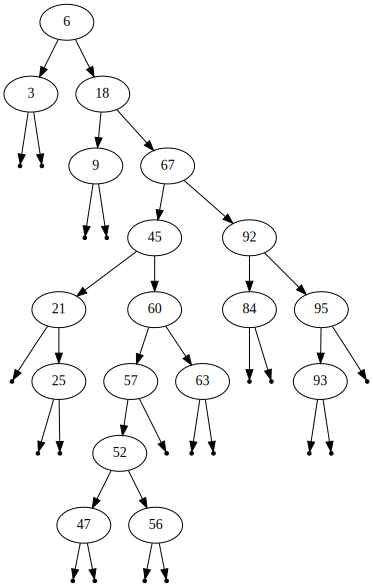

In [15]:
import graphviz as gv
gv.Source.from_file("1.dot")